# COVID-19 Mortality Rates Analysis: Philippine Provinces

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
sns.set_context('paper')

## Data Loading and Preprocessing

In [3]:
df = pd.read_csv('../data/combined_covid_case_information_20230527.csv')
df.shape

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_54477/2757023263.py:1: DtypeWarning: Columns (7,8,10,15,16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/combined_covid_case_information_20230527.csv')


(4137440, 22)

In [4]:
df.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

In [5]:
# Filtering Relevant Columns
df = df[[
    'AgeGroup', 
    'Sex', 
    'DateSpecimen', 
    'DateResultRelease', 
    'DateRepConf', 
    'DateDied', 
    'DateRecover',
    'ProvRes', 
    'HealthStatus',
    'DateOnset'
]]

In [6]:
# Converting date fields to Pandas DateTime type 
for date_field in ['DateSpecimen', 'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover', 'DateOnset']:
    df[date_field] = pd.to_datetime(df[date_field])

In [7]:
# Filtering Deaths 
print(df['HealthStatus'].unique())
df = df[df['HealthStatus'] == 'DIED']
df.shape

['RECOVERED' 'DIED' 'SEVERE' 'CRITICAL' 'MODERATE' 'ASYMPTOMATIC' 'MILD']


(66466, 10)

In [8]:
# Adding a new date field: infection proxy 
# Checks the first field with a value and uses it as the proxy
# Order of fields: 'DateOnset', 'DateSpecimen', 'DateResultRelease', 'DateRepConf', 'DateDied'
df['DateInfectionProxy'] = df['DateOnset'] 
for date_field in ['DateSpecimen', 'DateResultRelease', 'DateRepConf', 'DateDied']:
    null_rows = df[df['DateInfectionProxy'].isna()].index
    df['DateInfectionProxy'].loc[null_rows] = df[date_field].loc[null_rows]

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_54477/3432444309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateInfectionProxy'].loc[null_rows] = df[date_field].loc[null_rows]
/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_54477/3432444309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateInfectionProxy'].loc[null_rows] = df[date_field].loc[null_rows]
/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_54477/3432444309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [9]:
# Remaining Null Values
df[df['DateInfectionProxy'].isna()].shape

(0, 11)

In [10]:
# Filtering records with Sex, Age, Province
df = df[df['AgeGroup'].notna() & df['Sex'].notna() & df['ProvRes'].notna()]
df.shape

(66178, 11)

In [11]:
# Filtering Relevant Columns
df = df[[
    'AgeGroup', 
    'Sex', 
    'DateInfectionProxy',
    'ProvRes'
]]
df.shape

(66178, 4)

## Temporal Distribution

2020-01-18 00:00:00 2023-05-09 00:00:00


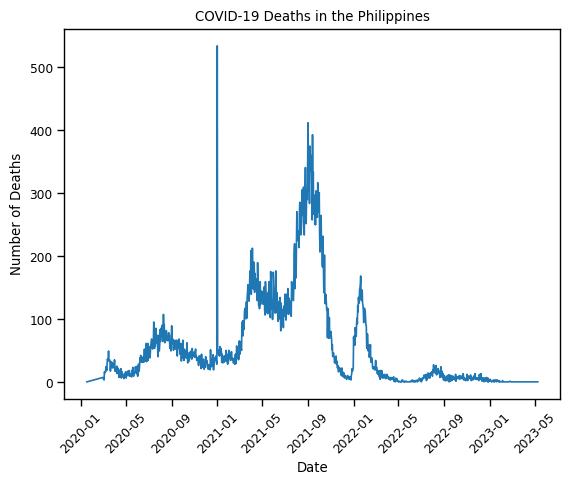

In [12]:
time_series = df['DateInfectionProxy'].value_counts().sort_index() 
print(time_series.index.min(), time_series.index.max())

plt.title('COVID-19 Deaths in the Philippines')
plt.ylabel('Number of Deaths') 
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(time_series)

## Sex Distribution

In [13]:
df['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [14]:
df['Sex'].value_counts()

Sex
MALE      36511
FEMALE    29667
Name: count, dtype: int64

## Age Distribution

In [15]:
df['AgeGroup'].unique()

array(['40 to 44', '60 to 64', '55 to 59', '80+', '50 to 54', '65 to 69',
       '75 to 79', '45 to 49', '70 to 74', '35 to 39', '30 to 34',
       '15 to 19', '5 to 9', '10 to 14', '20 to 24', '0 to 4', '25 to 29'],
      dtype=object)

In [16]:
age_groups = [
        '0 to 4', '5 to 9', '10 to 14', 
        '15 to 19', '20 to 24', '25 to 29', '30 to 34',
        '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59',
        '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80+']

In [17]:
age = df['AgeGroup'].value_counts().loc[age_groups]
age

AgeGroup
0 to 4       772
5 to 9       160
10 to 14     235
15 to 19     359
20 to 24     657
25 to 29    1195
30 to 34    1539
35 to 39    1984
40 to 44    2714
45 to 49    3706
50 to 54    5365
55 to 59    6885
60 to 64    7989
65 to 69    8753
70 to 74    8237
75 to 79    6154
80+         9474
Name: count, dtype: int64

In [18]:
age.to_excel('../results/aggregate_Mortality Age Distribution.xlsx')

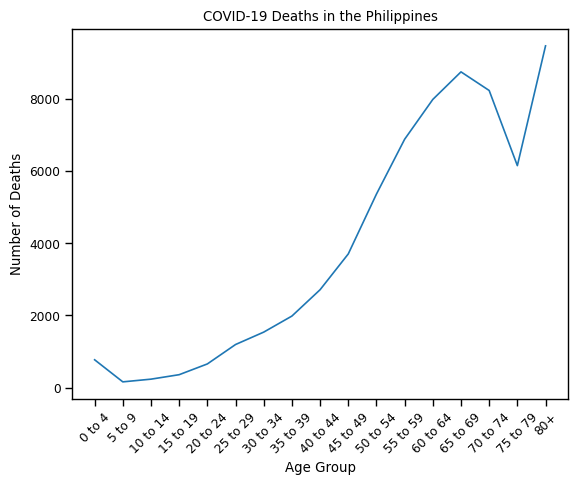

In [19]:
plt.title('COVID-19 Deaths in the Philippines')
plt.ylabel('Number of Deaths') 
plt.xlabel('Age Group')
plt.xticks(rotation=45)
# plt.yscale('log')
plt.plot(age)
plt.savefig("../results/aggregate_Mortality Age Distribution.png", bbox_inches ="tight")

## Province-level Number of Mortality by Age Group

In [20]:
provinces = df['ProvRes'].unique()
provinces.sort()
provinces

array(['ABRA', 'AGUSAN DEL NORTE', 'AGUSAN DEL SUR', 'AKLAN', 'ALBAY',
       'ANTIQUE', 'APAYAO', 'AURORA', 'BASILAN', 'BATAAN', 'BATANES',
       'BATANGAS', 'BENGUET', 'BILIRAN', 'BOHOL', 'BUKIDNON', 'BULACAN',
       'CAGAYAN', 'CAMARINES NORTE', 'CAMARINES SUR', 'CAMIGUIN', 'CAPIZ',
       'CATANDUANES', 'CAVITE', 'CEBU',
       'CITY OF ISABELA (NOT A PROVINCE)', 'COTABATO (NORTH COTABATO)',
       'COTABATO CITY (NOT A PROVINCE)', 'DAVAO DE ORO',
       'DAVAO DEL NORTE', 'DAVAO DEL SUR', 'DAVAO OCCIDENTAL',
       'DAVAO ORIENTAL', 'DINAGAT ISLANDS', 'EASTERN SAMAR', 'GUIMARAS',
       'IFUGAO', 'ILOCOS NORTE', 'ILOCOS SUR', 'ILOILO', 'ISABELA',
       'KALINGA', 'LA UNION', 'LAGUNA', 'LANAO DEL NORTE',
       'LANAO DEL SUR', 'LEYTE', 'MAGUINDANAO', 'MARINDUQUE', 'MASBATE',
       'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL', 'MOUNTAIN PROVINCE',
       'NCR', 'NEGROS OCCIDENTAL', 'NEGROS ORIENTAL', 'NORTHERN SAMAR',
       'NUEVA ECIJA', 'NUEVA VIZCAYA', 'OCCIDENTAL MINDORO',
   

In [21]:
provinces.shape

(84,)

82 Provinces (including NCR) and 2 Cities: CITY OF ISABELA (NOT A PROVINCE) and COTABATO CITY (NOT A PROVINCE).

In [22]:
province_age_mortality = pd.DataFrame(index=age_groups)
province_age_mortality.shape

(17, 0)

In [23]:
for province in provinces:
    province_age_mortality[province] = df[df['ProvRes'] == province]['AgeGroup'].value_counts()
province_age_mortality = province_age_mortality.fillna(0) 
province_age_mortality = province_age_mortality.T
province_age_mortality

,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+
ABRA,3.0,0.0,0.0,0.0,0.0,8.0,4.0,4.0,3.0,8.0,8.0,17.0,12.0,23.0,15.0,12.0,39.0
AGUSAN DEL NORTE,7.0,0.0,1.0,4.0,5.0,6.0,21.0,19.0,24.0,30.0,58.0,66.0,82.0,66.0,81.0,54.0,73.0
AGUSAN DEL SUR,5.0,0.0,2.0,1.0,5.0,3.0,8.0,12.0,13.0,22.0,37.0,38.0,54.0,41.0,34.0,26.0,32.0
AKLAN,2.0,0.0,1.0,1.0,5.0,6.0,6.0,5.0,9.0,15.0,22.0,19.0,24.0,27.0,41.0,26.0,43.0
ALBAY,6.0,2.0,2.0,2.0,3.0,7.0,8.0,9.0,12.0,16.0,27.0,41.0,49.0,41.0,44.0,49.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAWI-TAWI,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
ZAMBALES,3.0,1.0,1.0,4.0,5.0,6.0,10.0,24.0,22.0,28.0,69.0,99.0,86.0,114.0,119.0,93.0,140.0
ZAMBOANGA DEL NORTE,3.0,2.0,1.0,1.0,1.0,7.0,7.0,6.0,10.0,18.0,19.0,38.0,46.0,35.0,32.0,22.0,43.0
ZAMBOANGA DEL SUR,21.0,1.0,7.0,9.0,13.0,19.0,22.0,26.0,46.0,60.0,91.0,132.0,122.0,167.0,147.0,83.0,112.0


In [24]:
province_age_mortality.to_excel('../results/province_Number of Mortality by Age Group.xlsx')

In [25]:
province_age_mortality_summary = province_age_mortality.describe()
province_age_mortality_summary

,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,9.190476,1.904762,2.797619,4.273810,7.821429,14.226190,18.321429,23.619048,32.309524,44.119048,63.869048,81.964286,95.107143,104.202381,98.059524,73.261905,112.785714
std,15.867278,3.572381,5.430347,9.236323,16.528297,32.851748,39.250251,50.436386,69.415108,89.611801,130.799007,164.109899,202.477607,222.727332,210.235344,153.094751,248.168766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,6.000000,7.750000,12.000000,15.000000,16.000000,14.000000,9.000000,13.750000
50%,4.000000,1.000000,1.000000,2.000000,3.000000,6.000000,7.000000,8.500000,12.000000,17.500000,22.000000,36.500000,39.500000,41.000000,38.000000,27.500000,44.000000
75%,10.000000,2.000000,4.000000,4.250000,9.000000,15.500000,18.750000,26.250000,37.750000,39.750000,71.250000,94.250000,97.500000,115.000000,103.250000,84.000000,113.250000
max,111.000000,24.000000,42.000000,75.000000,133.000000,267.000000,317.000000,399.000000,565.000000,712.000000,1057.000000,1333.000000,1690.000000,1862.000000,1773.000000,1293.000000,2108.000000


In [26]:
province_age_mortality_summary.to_excel('../results/province_Number of Mortality by Age Group_summary.xlsx')

## Province-level Age-Specific Mortality Rates

In [27]:
province_population = pd.read_excel('../data/Philippine Population 2020 by Province and Age Group.xlsx', index_col=0)
province_population.shape

(85, 17)

There are 85 provinces compared to 84 in the COVID-19 data. What is the extra one?

In [28]:
province_population.index

Index(['BASILAN', 'COTABATO CITY (NOT A PROVINCE)', 'LANAO DEL SUR',
       'MAGUINDANAO', 'SULU', 'TAWI-TAWI', 'INTERIM PROVINCE', 'ABRA',
       'APAYAO', 'BENGUET', 'IFUGAO', 'KALINGA', 'MOUNTAIN PROVINCE',
       'AGUSAN DEL NORTE', 'AGUSAN DEL SUR', 'DINAGAT ISLANDS',
       'SURIGAO DEL NORTE', 'SURIGAO DEL SUR', 'NCR', 'ILOCOS NORTE',
       'ILOCOS SUR', 'LA UNION', 'PANGASINAN', 'BATANES', 'CAGAYAN', 'ISABELA',
       'NUEVA VIZCAYA', 'QUIRINO', 'AURORA', 'BATAAN', 'BULACAN',
       'NUEVA ECIJA', 'PAMPANGA', 'TARLAC', 'ZAMBALES', 'BATANGAS', 'CAVITE',
       'LAGUNA', 'QUEZON', 'RIZAL', 'MARINDUQUE', 'OCCIDENTAL MINDORO',
       'ORIENTAL MINDORO', 'PALAWAN', 'ROMBLON',
       'CITY OF ISABELA (NOT A PROVINCE)', 'ZAMBOANGA DEL NORTE',
       'ZAMBOANGA DEL SUR', 'ZAMBOANGA SIBUGAY', 'ALBAY', 'CAMARINES NORTE',
       'CAMARINES SUR', 'CATANDUANES', 'MASBATE', 'SORSOGON', 'AKLAN',
       'ANTIQUE', 'CAPIZ', 'GUIMARAS', 'ILOILO', 'NEGROS OCCIDENTAL', 'BOHOL',
       'CEBU', 'NE

In [29]:
for province in province_population.index:
    if province not in provinces: 
        print(province)

INTERIM PROVINCE


The Interim Province is in Mindanao. It is decided that it will not be included in the analysis because the COVID-19 data does not include this value.

In [30]:
province_population = province_population.drop('INTERIM PROVINCE')
province_population.shape

(84, 17)

In [31]:
province_population = province_population.sort_index()
province_population

,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+
ABRA,19821,24125,25170,25328,21023,19781,18018,16609,14854,12620,12128,10944,9839,7406,4980,3085,4578
AGUSAN DEL NORTE,72870,82999,82368,77350,68271,61227,55429,45831,41852,37178,34677,30340,24685,17409,11163,6718,6754
AGUSAN DEL SUR,81142,91104,86720,77631,62610,58780,52190,43045,37694,34391,31215,26645,21102,14082,8883,5551,5206
AKLAN,56731,59025,61231,57716,55483,50879,45503,40676,36030,30649,28425,24598,21008,16178,11763,8087,9003
ALBAY,138688,147794,150748,148877,123071,102774,90740,82833,77737,67298,62039,52476,43693,32546,23532,14132,13572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAWI-TAWI,69205,57811,51303,46037,39149,36066,30121,27751,23614,19288,13179,8890,6326,4795,2628,1324,1058
ZAMBALES,82585,88373,88517,85558,83719,74819,69013,60546,53966,48287,45113,38079,31118,22643,16179,8544,9125
ZAMBOANGA DEL NORTE,120426,120246,115252,107041,91948,79620,67983,59352,54920,51134,46059,39528,32276,24213,15536,10492,9991
ZAMBOANGA DEL SUR,216496,226162,218250,204777,189972,167998,141814,122175,113419,98429,86316,72438,59503,42790,26616,15364,15274


### Age-Specific Mortality Rates per 100 000 population

In [32]:
province_age_specific_mortality_rate  = province_age_mortality / province_population * 100000
province_age_specific_mortality_rate

,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+
ABRA,15.135462,0.000000,0.000000,0.000000,0.000000,40.442849,22.200022,24.083328,20.196580,63.391442,65.963061,155.336257,121.963614,310.559006,301.204819,388.978930,851.900393
AGUSAN DEL NORTE,9.606148,0.000000,1.214064,5.171299,7.323754,9.799598,37.886305,41.456656,57.344930,80.692883,167.257837,217.534608,332.185538,379.114251,725.611395,803.810658,1080.840983
AGUSAN DEL SUR,6.162037,0.000000,2.306273,1.288145,7.985945,5.103777,15.328607,27.877802,34.488247,63.970225,118.532757,142.615875,255.899915,291.151825,382.753574,468.384075,614.675375
AKLAN,3.525409,0.000000,1.633160,1.732622,9.011769,11.792685,13.185944,12.292261,24.979184,48.941238,77.396658,77.242052,114.242193,166.893312,348.550540,321.503648,477.618572
ALBAY,4.326257,1.353235,1.326717,1.343391,2.437617,6.811061,8.816399,10.865235,15.436665,23.774852,43.521011,78.130955,112.146110,125.975542,186.979432,346.730824,390.509873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAWI-TAWI,0.000000,0.000000,1.949204,2.172166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.587829,11.248594,15.807777,0.000000,38.051750,0.000000,0.000000
ZAMBALES,3.632621,1.131567,1.129726,4.675191,5.972360,8.019353,14.490024,39.639283,40.766408,57.986622,152.949261,259.985819,276.367376,503.466855,735.521355,1088.483146,1534.246575
ZAMBOANGA DEL NORTE,2.491156,1.663257,0.867664,0.934221,1.087571,8.791761,10.296692,10.109179,18.208303,35.201627,41.251438,96.134386,142.520758,144.550448,205.973223,209.683568,430.387349
ZAMBOANGA DEL SUR,9.699948,0.442161,3.207331,4.395025,6.843114,11.309658,15.513278,21.280949,40.557579,60.957645,105.426572,182.224799,205.031679,390.278102,552.299369,540.223900,733.272227


In [33]:
province_age_specific_mortality_rate.to_excel('../results/province_Age-Specific Mortality Rates (per 100 000) by Age Group.xlsx')

In [47]:
province_age_specific_mortality_rate_copy = province_age_specific_mortality_rate.rename(columns={
    '0 to 4': '0–4',
    '5 to 9': '5–9', 
    '10 to 14': '10–14', 
    '15 to 19': '15–19', 
    '20 to 24': '20–24',
    '25 to 29': '25–29', 
    '30 to 34': '30–34', 
    '35 to 39': '35–39', 
    '40 to 44': '40–44', 
    '45 to 49': '45–49', 
    '50 to 54': '50–54', 
    '55 to 59': '55–59',
    '60 to 64': '60–64', 
    '65 to 69': '65–69', 
    '70 to 74': '70–74', 
    '75 to 79': '75–79', 
    '80+': '≥80'
})

In [34]:
province_age_specific_mortality_rate_summary = province_age_specific_mortality_rate.describe() 
province_age_specific_mortality_rate_summary

,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,7.223297,1.506685,2.142259,2.909161,6.084703,11.737552,15.780534,24.070308,35.439723,58.632245,92.271072,145.476350,195.862860,305.767215,435.946508,545.140839,792.224642
std,7.806059,2.337479,3.101696,3.358416,4.939959,10.709248,11.817758,21.549236,31.628379,48.075815,75.858022,104.879931,136.758699,206.238255,311.590666,442.877600,640.478273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.569757,0.000000,0.000000
25%,2.150140,0.000000,0.000000,0.000000,2.489445,4.769544,7.844382,7.400930,15.239429,23.960865,39.894188,76.668297,92.272380,157.955330,194.269198,211.891979,347.267535
50%,4.786785,0.532459,1.309113,1.951821,5.124941,8.673845,14.350986,20.696790,29.840756,46.227327,64.829791,124.861033,187.603215,284.429873,364.220584,472.665556,640.896110
75%,9.612693,1.947129,2.420340,4.465066,8.420605,16.496992,21.506470,33.976462,46.042465,69.629752,120.153054,183.127728,271.819452,391.841167,593.629844,736.990158,1046.652980
max,45.072962,11.057054,21.652052,18.851030,25.790922,50.438818,53.585911,107.360134,192.307692,234.531783,384.156154,542.283011,732.905176,1279.516749,1769.756439,2350.299401,3453.256303


In [35]:
province_age_specific_mortality_rate_summary.to_excel('../results/province_Age-Specific Mortality Rates (per 100 000) by Age Group_summary.xlsx')

In [39]:
province_age_specific_mortality_rate_summary_copy = province_age_specific_mortality_rate_summary

In [44]:
province_age_specific_mortality_rate_summary_copy.columns

Index(['0 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59',
       '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80+'],
      dtype='object')

In [46]:
province_age_specific_mortality_rate_summary_copy = province_age_specific_mortality_rate_summary_copy.rename(columns={
    '0 to 4': '0–4',
    '5 to 9': '5–9', 
    '10 to 14': '10–14', 
    '15 to 19': '15–19', 
    '20 to 24': '20–24',
    '25 to 29': '25–29', 
    '30 to 34': '30–34', 
    '35 to 39': '35–39', 
    '40 to 44': '40–44', 
    '45 to 49': '45–49', 
    '50 to 54': '50–54', 
    '55 to 59': '55–59',
    '60 to 64': '60–64', 
    '65 to 69': '65–69', 
    '70 to 74': '70–74', 
    '75 to 79': '75–79', 
    '80+': '≥80'
})

/Users/jimuelcelestejr/opt/anaconda3/envs/covid-asmr-philippines/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


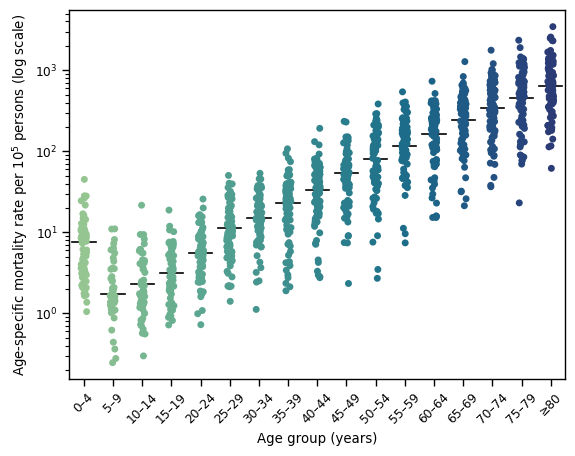

In [51]:
# plt.title('Province-level Mortality Rate (per 100,000) by Age Group')
plt.xticks(rotation=45)
plt.xlabel('Age group (years)')
plt.ylabel('Age-specific mortality rate per $10^5$ persons (log scale)')
plt.yscale('log')
sns.stripplot(province_age_specific_mortality_rate_copy, palette='crest')
sns.boxplot(province_age_specific_mortality_rate_summary_copy, color='black', 
            medianprops={'visible': True},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.savefig("../results/province_Age-Specific Mortality Rates (per 100 000) by Age Group.png", bbox_inches ="tight")

## Province-level Crude Mortality Rates (CMR) per 100 000 population

In [52]:
output = pd.DataFrame()
output['population'] = province_population.sum(axis=1)
output['mortality'] = province_age_mortality.sum(axis=1)
output['crude_mortality_rate_per_100k'] = output['mortality'] / output['population'] * 100000
output 

,population,mortality,crude_mortality_rate_per_100k
ABRA,250309,156.0,62.322969
AGUSAN DEL NORTE,757121,597.0,78.851333
AGUSAN DEL SUR,737991,333.0,45.122501
AKLAN,612985,252.0,41.110304
ALBAY,1372550,371.0,27.029981
...,...,...,...
TAWI-TAWI,438545,6.0,1.368161
ZAMBALES,906184,824.0,90.930760
ZAMBOANGA DEL NORTE,1046017,291.0,27.819816
ZAMBOANGA DEL SUR,2017793,1078.0,53.424707


## Province-level Age-Standardized Mortality Rates (ASMR) per 100 000 population

Standard Population: Philippine Population

In [53]:
ph_age_population = pd.read_excel('../data/PH_population.xlsx', index_col=0)
ph_age_population

,Population
0 to 4,11066707
5 to 9,11266823
10 to 14,11080715
15 to 19,10459186
20 to 24,9969846
25 to 29,9172896
30 to 34,8120568
35 to 39,7179320
40 to 44,6491312
45 to 49,5571168


In [54]:
weight = ph_age_population / ph_age_population.sum().sum()
weight = weight.values.flatten()
weight

array([0.10184051, 0.10368206, 0.10196942, 0.09624984, 0.09174673,
       0.08441286, 0.07472889, 0.06606713, 0.05973579, 0.05126824,
       0.04547572, 0.03795187, 0.03098661, 0.02202619, 0.01449748,
       0.00856387, 0.00879678])

In [55]:
output['age_standardized_mortality_rate_per_100k'] = 0
output

,population,mortality,crude_mortality_rate_per_100k,age_standardized_mortality_rate_per_100k
ABRA,250309,156.0,62.322969,0
AGUSAN DEL NORTE,757121,597.0,78.851333,0
AGUSAN DEL SUR,737991,333.0,45.122501,0
AKLAN,612985,252.0,41.110304,0
ALBAY,1372550,371.0,27.029981,0
...,...,...,...,...
TAWI-TAWI,438545,6.0,1.368161,0
ZAMBALES,906184,824.0,90.930760,0
ZAMBOANGA DEL NORTE,1046017,291.0,27.819816,0
ZAMBOANGA DEL SUR,2017793,1078.0,53.424707,0


In [56]:
for province in provinces:
    age_mortality_rate = province_age_mortality.loc[province] / province_population.loc[province]
    age_mortality_rate = age_mortality_rate.values
    asmr = np.sum(weight * age_mortality_rate) * 100000 
    output.loc[province, 'age_standardized_mortality_rate_per_100k'] = asmr

In [57]:
output

,population,mortality,crude_mortality_rate_per_100k,age_standardized_mortality_rate_per_100k
ABRA,250309,156.0,62.322969,47.368369
AGUSAN DEL NORTE,757121,597.0,78.851333,77.648566
AGUSAN DEL SUR,737991,333.0,45.122501,50.589968
AKLAN,612985,252.0,41.110304,33.988423
ALBAY,1372550,371.0,27.029981,25.471226
...,...,...,...,...
TAWI-TAWI,438545,6.0,1.368161,2.221281
ZAMBALES,906184,824.0,90.930760,81.343927
ZAMBOANGA DEL NORTE,1046017,291.0,27.819816,27.468587
ZAMBOANGA DEL SUR,2017793,1078.0,53.424707,57.222952


## CMR vs ASMR

In [58]:
output['difference'] = output['crude_mortality_rate_per_100k'] - output['age_standardized_mortality_rate_per_100k']

In [59]:
output = output.sort_values(by='age_standardized_mortality_rate_per_100k')

In [60]:
output.to_excel('../results/province_CMR and ASMR per 100 000 by Province.xlsx')

In [61]:
output_summary = output.describe()
output_summary

,population,mortality,crude_mortality_rate_per_100k,age_standardized_mortality_rate_per_100k,difference
count,8.400000e+01,84.000000,84.000000,84.000000,84.000000
mean,1.291092e+06,787.833333,53.406403,51.310723,2.095680
std,1.699669e+06,1653.454980,38.904825,36.638445,8.856819
min,1.859300e+04,4.000000,1.368161,2.221281,-31.338525
25%,4.360298e+05,126.500000,22.315531,24.783053,-2.351544
50%,8.121110e+05,329.000000,48.363219,44.732534,1.260311
75%,1.508705e+06,839.250000,73.077589,67.482628,7.224624
max,1.340355e+07,13761.000000,211.033297,207.832506,24.986568


In [62]:
output_summary.to_excel('../results/province_CMR and ASMR per 100 000 by Province_summary.xlsx')

<BarContainer object of 84 artists>

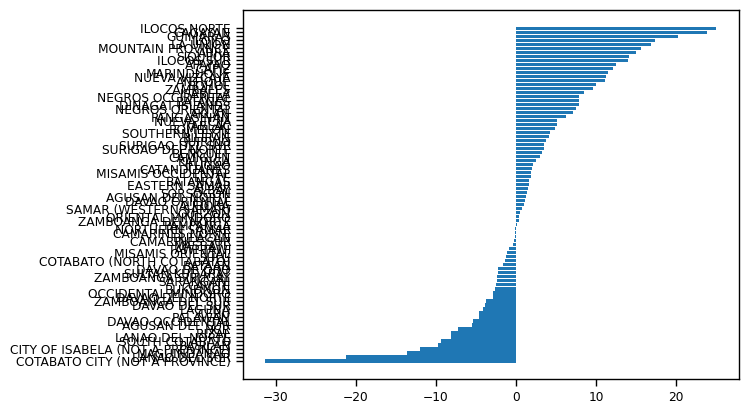

In [63]:
difference = output['difference']
difference = difference.sort_values() 
plt.barh(difference.index, difference)